
===== NEXT 12-MONTH PROJECTION: AVERAGE AMOUNT PAID =====

            Projected Average Amount
2026-01-01                 42.238254
2026-02-01                 42.277128
2026-03-01                 42.316003
2026-04-01                 42.354878
2026-05-01                 42.393752
2026-06-01                 42.432627
2026-07-01                 42.471502
2026-08-01                 42.510376
2026-09-01                 42.549251
2026-10-01                 42.588126
2026-11-01                 42.627001
2026-12-01                 42.665875


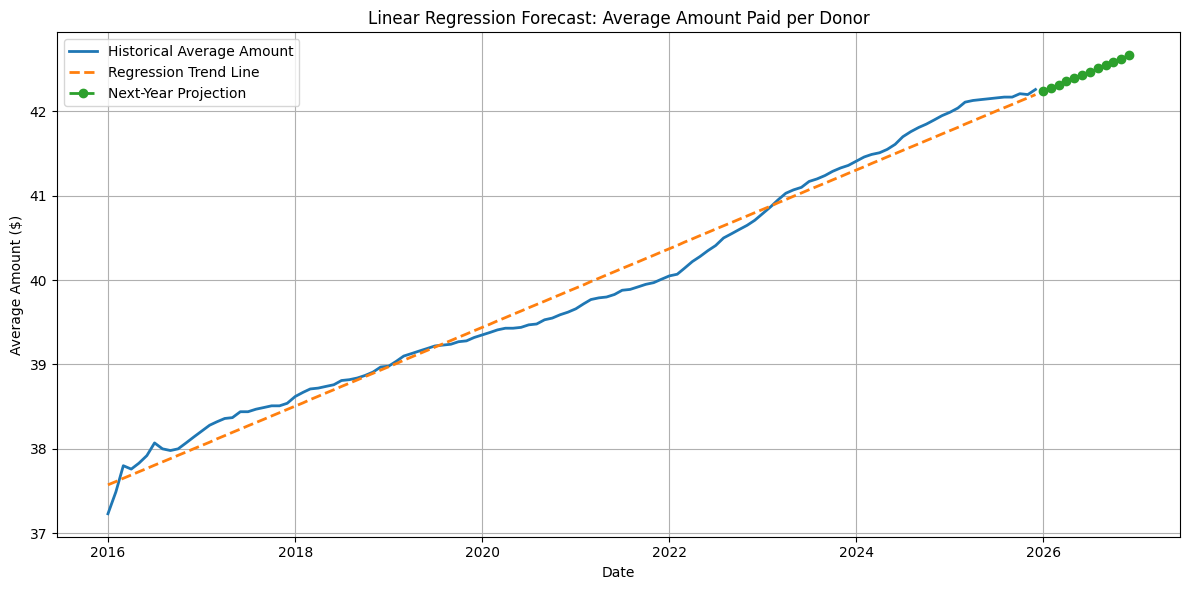

In [2]:
# ============================================
# Linear Regression Forecast for Average Amount
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --------------------------------------------
# 1. Load Data
# WHY: We must convert the fiscal label into a proper datetime
#      to treat the dataset as a true time series.
# --------------------------------------------
df = pd.read_excel('/Users/noahmancione/OneDrive/Noah Python Projects/Capstone Project/Sample Non-profit Data 2015-2025.xlsx')

df["date"] = pd.to_datetime(
    df["Fiscal Year-Month Label"].str.replace(" - ", "-") + "-01"
)
df = df.set_index("date").sort_index()

# Target variable
y = df["Average Amount (Active)"]

# --------------------------------------------
# 2. Convert dates into a numerical index
# WHY: Linear regression requires numeric inputs.
#      We use the month index to let the model learn a trend over time.
# --------------------------------------------
X = np.arange(len(y)).reshape(-1, 1)

# --------------------------------------------
# 3. Fit Linear Regression
# WHY: The model learns a straight-line trend in the average donor amount.
# --------------------------------------------
model = LinearRegression()
model.fit(X, y)

# --------------------------------------------
# 4. Forecast next 12 months
# WHY: We extend the index and apply the trained model.
# --------------------------------------------
last_index = X[-1, 0]
future_X = np.arange(last_index + 1, last_index + 13).reshape(-1, 1)
future_pred = model.predict(future_X)

# Create future date index
future_dates = pd.date_range(
    start=y.index.max() + pd.offsets.MonthBegin(1),
    periods=12,
    freq="MS"
)

forecast_df = pd.DataFrame({
    "Projected Average Amount": future_pred
}, index=future_dates)

print("\n===== NEXT 12-MONTH PROJECTION: AVERAGE AMOUNT PAID =====\n")
print(forecast_df)

# --------------------------------------------
# 5. Plot historical data and regression line
# WHY: Visualizing the model helps evaluate whether a linear trend
#      is reasonable for this variable.
# --------------------------------------------
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y.index, y.values, label="Historical Average Amount", linewidth=2)

# Regression line over historical range
y_pred_full = model.predict(X)
plt.plot(y.index, y_pred_full, "--", label="Regression Trend Line", linewidth=2)

# Future projection line
plt.plot(future_dates, future_pred, "o--", label="Next-Year Projection", linewidth=2)

plt.title("Linear Regression Forecast: Average Amount Paid per Donor")
plt.xlabel("Date")
plt.ylabel("Average Amount ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
# ============================================
# SAVE LINEAR REGRESSION FORECAST TO SAME FOLDER AS INPUT FILE
# ============================================

from pathlib import Path
import pandas as pd  # in case not already imported

# 1. Build the forecast output DataFrame
# WHY: We need a clean, single DataFrame to export to Excel
forecast_output = pd.DataFrame({
    "Date": future_dates,
    "Projected_Average_Amount": future_pred
})

forecast_output["Date"] = pd.to_datetime(forecast_output["Date"])

# 2. Path of the input file you originally read
input_path = Path("/Users/noahmancione/OneDrive/Noah Python Projects/Capstone Project/Sample Non-profit Data 2015-2025.xlsx")

# 3. Extract the folder the input file is in
output_folder = input_path.parent

# 4. Build the output path
output_path = output_folder / "linear_regression_forecast_avg_amount.xlsx"

# 5. Save using openpyxl
with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
    forecast_output.to_excel(writer, index=False, sheet_name="AvgAmountForecast")

print(f"Forecast saved to: {output_path}")


Forecast saved to: /Users/noahmancione/OneDrive/Noah Python Projects/Capstone Project/linear_regression_forecast_avg_amount.xlsx
